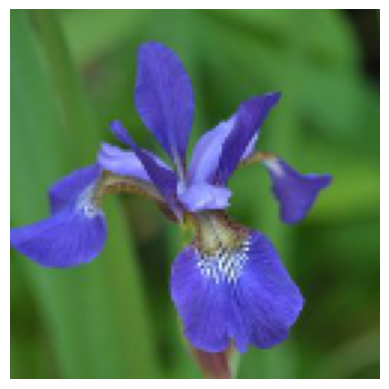

In [3]:
# plotting a random image
img = plt.imread("C:/iris/iris/iris-setosa/iris-0c826b6f4648edf507e0cafdab53712bb6fd1f04dab453cee8db774a728dd640.jpg")
img = cv2.resize(img,(124,124))
plt.imshow(img)
plt.axis("off")
plt.show()

In [4]:
x_ = list()
y = list()
IMG_SIZE = 128
for i in os.listdir("C:/iris/iris/iris-setosa"):
    try:
        path = "C:/iris/iris/iris-setosa/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(0)
    except:
        None
for i in os.listdir("C:/iris/iris/iris-versicolour"):
    try:
        path = "C:/iris/iris/iris-versicolour/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir("C:/iris/iris/iris-virginica"):
    try:
        path = "C:/iris/iris/iris-virginica/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(2)
    except:
        None

x_ = np.array(x_)

In [5]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [6]:
x_.shape

(421, 128, 128, 3)

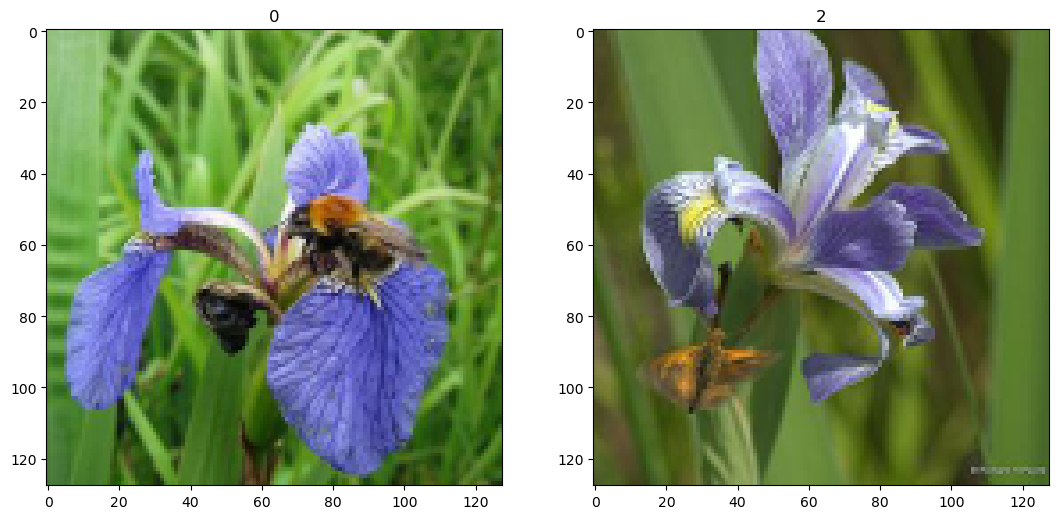

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i in range(3):
    index = 420 * i
    if index < 421:
        img = x_[420*i]
        plt.subplot(1, 3, i + 1)
        plt.title(y[420*i])
        plt.imshow(img)

IndexError: index 840 is out of bounds for axis 0 with size 421

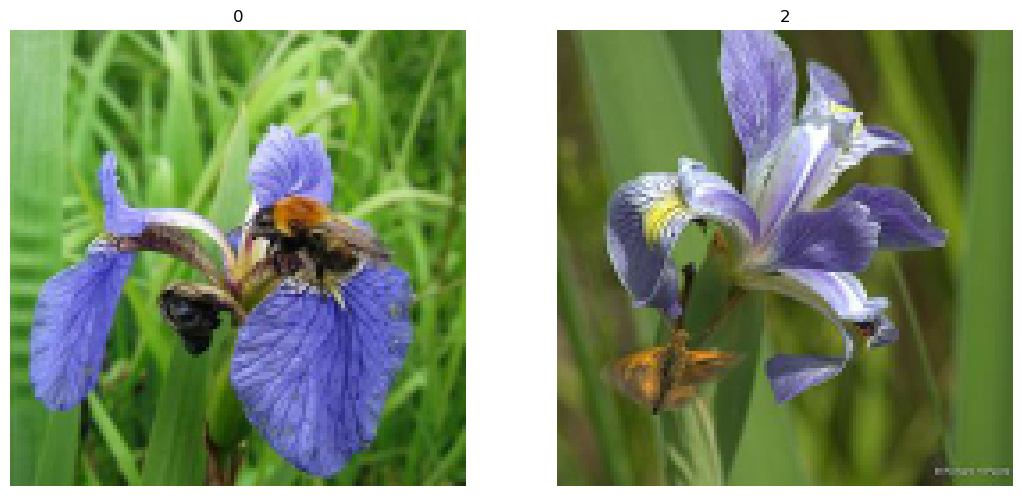

In [10]:
#plottin one of all flower types in data
plt.figure(figsize = (20,20))
for i in range(3):
    img = x_[420*i]
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y[420*i])

In [17]:
#data preparation
# for replacement process i'll use keras.to_categorical 
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes = 3)

In [18]:
# test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)

In [19]:
# validation and trains split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)

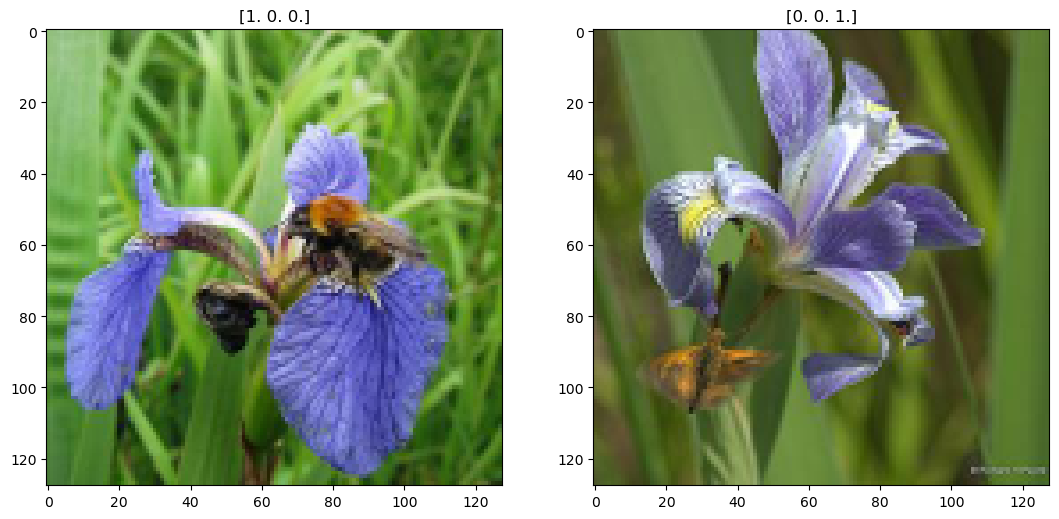

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i in range(3):
    index = 420 * i
    if index < 421:
        img = x_[420*i]
        plt.subplot(1, 3, i + 1)
        plt.title(y[420*i])
        plt.imshow(img)
        

C:\Users\hp\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


IndexError: index 420 is out of bounds for axis 0 with size 303

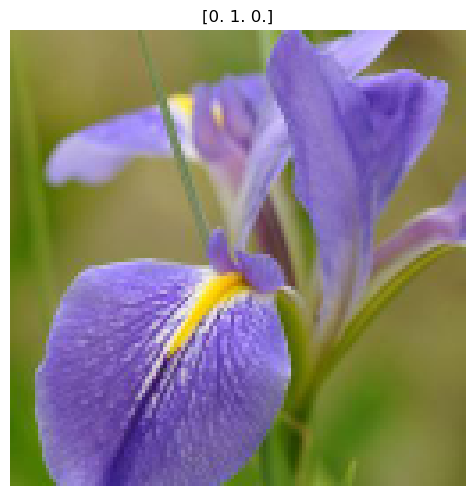

In [20]:
plt.figure(figsize = (20,20))
for i in range(3):
    img = x_train[420*i]
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[420*i])
plt.show()

In [22]:
#creating ANN model
print(x_train.shape)

(303, 128, 128, 3)


In [23]:
print(x_val.shape)

(54, 128, 128, 3)


In [24]:
print(y_train.shape)

(303, 3)


In [25]:
print(x_test.shape)

(64, 128, 128, 3)


In [26]:
x_train[0]

array([[[146, 148,  64],
        [147, 149,  66],
        [146, 148,  66],
        ...,
        [136, 127,  68],
        [139, 131,  69],
        [142, 134,  72]],

       [[145, 149,  64],
        [146, 149,  65],
        [146, 148,  65],
        ...,
        [135, 126,  67],
        [138, 130,  68],
        [140, 132,  70]],

       [[144, 148,  61],
        [145, 149,  63],
        [145, 147,  63],
        ...,
        [132, 123,  64],
        [136, 128,  66],
        [138, 130,  68]],

       ...,

       [[ 89, 125,  15],
        [ 88, 124,  14],
        [ 87, 124,  11],
        ...,
        [113, 114,  46],
        [109, 110,  42],
        [108, 109,  41]],

       [[ 91, 126,  16],
        [ 90, 125,  15],
        [ 89, 126,  13],
        ...,
        [112, 113,  45],
        [109, 110,  42],
        [108, 109,  41]],

       [[ 95, 129,  19],
        [ 95, 129,  19],
        [ 92, 129,  16],
        ...,
        [111, 112,  44],
        [109, 110,  42],
        [108, 109,  41]]

In [27]:
print(x_train.shape)
print(x_test.shape)

(303, 128, 128, 3)
(64, 128, 128, 3)


In [28]:
x_train=x_train.astype("float32")
y_train=y_train.astype("float32")
x_val=x_val.astype("float32")
y_val=y_val.astype("float32")

In [29]:
x_train=x_train/255
y_train=y_train/255
x_val=x_val/255
y_val=y_val/255

In [30]:
x_train[0]

array([[[0.57254905, 0.5803922 , 0.2509804 ],
        [0.5764706 , 0.58431375, 0.25882354],
        [0.57254905, 0.5803922 , 0.25882354],
        ...,
        [0.53333336, 0.49803922, 0.26666668],
        [0.54509807, 0.5137255 , 0.27058825],
        [0.5568628 , 0.5254902 , 0.28235295]],

       [[0.5686275 , 0.58431375, 0.2509804 ],
        [0.57254905, 0.58431375, 0.25490198],
        [0.57254905, 0.5803922 , 0.25490198],
        ...,
        [0.5294118 , 0.49411765, 0.2627451 ],
        [0.5411765 , 0.50980395, 0.26666668],
        [0.54901963, 0.5176471 , 0.27450982]],

       [[0.5647059 , 0.5803922 , 0.23921569],
        [0.5686275 , 0.58431375, 0.24705882],
        [0.5686275 , 0.5764706 , 0.24705882],
        ...,
        [0.5176471 , 0.48235294, 0.2509804 ],
        [0.53333336, 0.5019608 , 0.25882354],
        [0.5411765 , 0.50980395, 0.26666668]],

       ...,

       [[0.34901962, 0.49019608, 0.05882353],
        [0.34509805, 0.4862745 , 0.05490196],
        [0.34117648, 0

In [31]:
IMG_SIZE = 128


In [32]:
model=Sequential()
model.add(Dropout(0.2))
model.add(Flatten(input_shape=(128, 128, 3)))
model.add(Dense(128,activation='relu',
                use_bias=True,
                kernel_initializer="glorot_uniform",
                bias_initializer="zeros",
                kernel_regularizer=None,
                bias_regularizer=None,
                activity_regularizer=None,
                kernel_constraint=None,
                bias_constraint=None))
model.add(Dense(64,activation='relu',
                use_bias=True,
                kernel_initializer="glorot_uniform",
                bias_initializer="zeros",
                kernel_regularizer=None,
                bias_regularizer=None,
                activity_regularizer=None,
                kernel_constraint=None,
                bias_constraint=None))
model.add(Dense(32,activation='relu',
                use_bias=True,
                kernel_initializer="glorot_uniform",
                bias_initializer="zeros",
                kernel_regularizer=None,
                bias_regularizer=None,
                activity_regularizer=None,
                kernel_constraint=None,
                bias_constraint=None))
model.add(Dense(3,activation='softmax',kernel_initializer="glorot_uniform"))


In [33]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [34]:
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
10/10 [==============================] - 2s 125ms/step - loss: 0.0115 - accuracy: 0.4422 - val_loss: 0.0084 - val_accuracy: 0.2407
Epoch 2/50
10/10 [==============================] - 1s 98ms/step - loss: 0.0123 - accuracy: 0.3465 - val_loss: 0.0217 - val_accuracy: 0.1481
Epoch 3/50
10/10 [==============================] - 1s 98ms/step - loss: 0.0177 - accuracy: 0.3564 - val_loss: 0.0247 - val_accuracy: 0.6296
Epoch 4/50
10/10 [==============================] - 1s 95ms/step - loss: 0.0429 - accuracy: 0.4422 - val_loss: 0.0302 - val_accuracy: 0.2222
Epoch 5/50
10/10 [==============================] - 1s 97ms/step - loss: 0.0618 - accuracy: 0.4224 - val_loss: 0.1326 - val_accuracy: 0.2222
Epoch 6/50
10/10 [==============================] - 1s 94ms/step - loss: 0.1467 - accuracy: 0.3498 - val_loss: 0.3107 - val_accuracy: 0.6296
Epoch 7/50
10/10 [==============================] - 1s 93ms/step - loss: 0.4082 - accuracy: 0.3828 - val_loss: 0.2588 - val_accuracy: 0.6296
Epoch 8/50
1

Text(0.5, 1.0, 'Accuracy Curves')

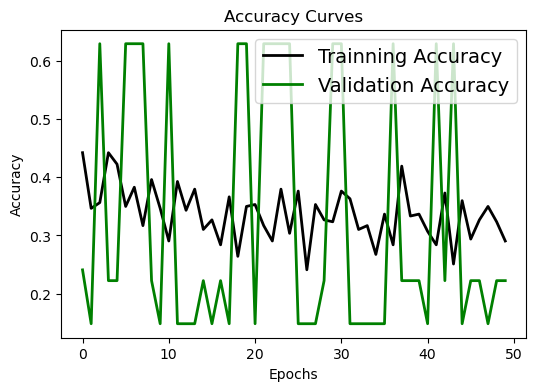

In [35]:
# Accuracy curve

plt.figure(figsize= [6,4])
plt.plot(history.history['accuracy'], 'black', linewidth = 2.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth = 2.0)
plt.legend(['Trainning Accuracy', 'Validation Accuracy'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.title('Accuracy Curves', fontsize = 12)

Text(0.5, 1.0, 'Loss Curves')

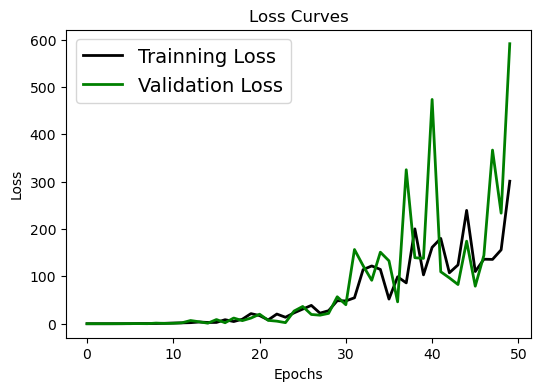

In [36]:
# loss curve

plt.figure(figsize= [6,4])
plt.plot(history.history['loss'], 'black', linewidth = 2.0)
plt.plot(history.history['val_loss'], 'green', linewidth = 2.0)
plt.legend(['Trainning Loss', 'Validation Loss'], fontsize = 14)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.title('Loss Curves', fontsize = 12)

In [37]:
model_2=Sequential()
model_2.add(Dropout(0.2))
model_2.add(Flatten(input_shape=(128, 128, 3)))
model_2.add(Dense(128,activation='relu',
                use_bias=True,
                kernel_initializer="he_uniform",
                bias_initializer="zeros",
                kernel_regularizer=None,
                bias_regularizer=None,
                activity_regularizer=None,
                kernel_constraint=None,
                bias_constraint=None))
model_2.add(Dense(64,activation='relu',
                use_bias=True,
                kernel_initializer="he_uniform",
                bias_initializer="zeros",
                kernel_regularizer=None,
                bias_regularizer=None,
                activity_regularizer=None,
                kernel_constraint=None,
                bias_constraint=None))
model_2.add(Dense(32,activation='relu',
                use_bias=True,
                kernel_initializer="he_uniform",
                bias_initializer="zeros",
                kernel_regularizer=None,
                bias_regularizer=None,
                activity_regularizer=None,
                kernel_constraint=None,
                bias_constraint=None))
model_2.add(Dense(3,activation='softmax',kernel_initializer="he_uniform"))

In [38]:
model_2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [41]:
history_2=model_2.fit(x_train,y_train,epochs=50,validation_data=(x_val,y_val))

Epoch 1/50
10/10 [==============================] - 1s 98ms/step - loss: 227.6781 - accuracy: 0.3366 - val_loss: 386.9088 - val_accuracy: 0.1481
Epoch 2/50
10/10 [==============================] - 1s 94ms/step - loss: 195.3926 - accuracy: 0.3861 - val_loss: 256.3396 - val_accuracy: 0.1481
Epoch 3/50
10/10 [==============================] - 1s 96ms/step - loss: 262.0236 - accuracy: 0.3168 - val_loss: 392.4522 - val_accuracy: 0.2222
Epoch 4/50
10/10 [==============================] - 1s 112ms/step - loss: 176.9590 - accuracy: 0.3333 - val_loss: 143.0731 - val_accuracy: 0.1481
Epoch 5/50
10/10 [==============================] - 1s 104ms/step - loss: 102.9076 - accuracy: 0.3135 - val_loss: 141.5708 - val_accuracy: 0.1481
Epoch 6/50
10/10 [==============================] - 1s 96ms/step - loss: 219.9798 - accuracy: 0.3300 - val_loss: 336.8268 - val_accuracy: 0.6296
Epoch 7/50
10/10 [==============================] - 1s 100ms/step - loss: 570.7461 - accuracy: 0.3399 - val_loss: 523.5048 - val

In [44]:
x_ = list()
y = list()
IMG_SIZE = 128
for i in os.listdir("C:/iris/iris/iris-setosa"):
    try:
        path = "C:/iris/iris/iris-setosa/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(0)
    except:
        None
for i in os.listdir("C:/iris/iris/iris-versicolour"):
    try:
        path = "C:/iris/iris/iris-versicolour/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(1)
    except:
        None
for i in os.listdir("C:/iris/iris/iris-virginica"):
    try:
        path = "C:/iris/iris/iris-virginica/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_.append(img)
        y.append(2)
    except:
        None

x_ = np.array(x_)

In [45]:
# for replacement process i'll use keras.to_categorical 
from keras.utils.np_utils import to_categorical
y = to_categorical(y,num_classes = 3)

In [47]:
# test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_,y,test_size = 0.15,random_state = 42)

In [48]:
# validation and trains split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.15,random_state = 42)

IndexError: index 420 is out of bounds for axis 0 with size 303

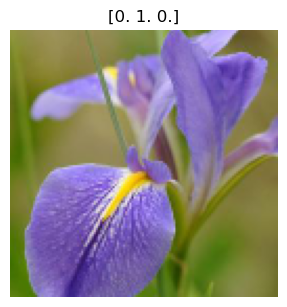

In [50]:
plt.figure(figsize = (20,20))
for i in range(3):
    img = x_train[420*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[420*i])
plt.show()

In [56]:

model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 3rd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 4th Convolutional Layer
model.add(Conv2D(filters=256,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 5th Convolutional Layer
model.add(Conv2D(filters=512,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
# Add output layer
model.add(Dense(3,activation="softmax"))

model.summary() # print summary my model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) #compile model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 64, 64, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 128)     

In [57]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])


In [58]:
epoch = 50 
batch_size = 64

In [59]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=60,  # randomly rotate images in the range (60, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
datagen.fit(x_train)

In [60]:
history = model.fit(datagen.flow(x_train,y_train,batch_size=batch_size),
                              epochs= epoch,validation_data=(x_val,y_val),
                              steps_per_epoch=x_train.shape[0] // batch_size
                              )



Epoch 1/50
4/4 [==============================] - 13s 3s/step - loss: 2.1886 - accuracy: 0.3431 - val_loss: 24.2747 - val_accuracy: 0.6296
Epoch 2/50
4/4 [==============================] - 12s 3s/step - loss: 1.7752 - accuracy: 0.3933 - val_loss: 51.7739 - val_accuracy: 0.2222
Epoch 3/50
4/4 [==============================] - 11s 3s/step - loss: 1.5704 - accuracy: 0.4184 - val_loss: 22.4071 - val_accuracy: 0.2222
Epoch 4/50
4/4 [==============================] - 11s 3s/step - loss: 1.3872 - accuracy: 0.4393 - val_loss: 86.8337 - val_accuracy: 0.1481
Epoch 5/50
4/4 [==============================] - 12s 3s/step - loss: 1.1602 - accuracy: 0.4979 - val_loss: 140.5067 - val_accuracy: 0.1481
Epoch 6/50
4/4 [==============================] - 12s 3s/step - loss: 1.0615 - accuracy: 0.5481 - val_loss: 81.5027 - val_accuracy: 0.1481
Epoch 7/50
4/4 [==============================] - 13s 3s/step - loss: 1.0991 - accuracy: 0.5391 - val_loss: 23.8128 - val_accuracy: 0.2222
Epoch 8/50
4/4 [==========

In [63]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [70]:
%cd C:\iris

C:\iris


In [71]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5", input_shape=IMAGE_SHAPE+(3,))
])

In [73]:
tiger_shark=Image.open("tiger_shark.jpeg").resize(IMAGE_SHAPE)

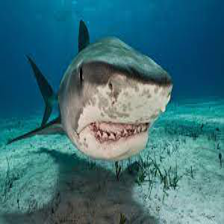

In [75]:
tiger_shark

In [77]:
tiger_shark = np.array(tiger_shark)/255.0
tiger_shark.shape

(224, 224, 3)

In [78]:
tiger_shark[np.newaxis, ...]

array([[[[0.00000000e+00, 1.30718954e-03, 1.87620146e-03],
         [0.00000000e+00, 1.30718954e-03, 1.87620146e-03],
         [0.00000000e+00, 1.30718954e-03, 1.87620146e-03],
         ...,
         [1.53787005e-05, 1.01499423e-03, 1.59938485e-03],
         [1.53787005e-05, 1.01499423e-03, 1.59938485e-03],
         [1.53787005e-05, 1.01499423e-03, 1.59938485e-03]],

        [[0.00000000e+00, 1.30718954e-03, 1.87620146e-03],
         [0.00000000e+00, 1.30718954e-03, 1.87620146e-03],
         [0.00000000e+00, 1.30718954e-03, 1.87620146e-03],
         ...,
         [1.53787005e-05, 1.01499423e-03, 1.59938485e-03],
         [1.53787005e-05, 1.01499423e-03, 1.59938485e-03],
         [1.53787005e-05, 1.01499423e-03, 1.59938485e-03]],

        [[0.00000000e+00, 1.30718954e-03, 1.87620146e-03],
         [0.00000000e+00, 1.30718954e-03, 1.87620146e-03],
         [0.00000000e+00, 1.30718954e-03, 1.87620146e-03],
         ...,
         [1.53787005e-05, 1.01499423e-03, 1.59938485e-03],
         [

In [79]:
result = classifier.predict(tiger_shark[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 451ms/step


(1, 1001)

In [80]:
predicted_label_index = np.argmax(result)
predicted_label_index

645

In [83]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']

In [84]:
image_labels[predicted_label_index]

'maypole'

In [87]:
%cd C:\iris\iris

C:\iris\iris


In [1]:
pip install kaggle

     -------------------------------------- 63.3/63.3 kB 282.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77717 sha256=f6355a77770d385fa96a7414f7486414ce9c90549ebb0dd9b27cde8eaddce354
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\9c\45\15\6d6d116cd2539fb8f450d64b0aee4a480e5366bb11b42ac763
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.
